# **SciPy**

SciPy is a collection of mathematical algorithms and convenience functions built on top of NumPy. It contains many useful subpackages.  
https://docs.scipy.org/doc/scipy/tutorial/index.html 


In [1]:
import scipy as sp 
import numpy as np
import matplotlib.pyplot as plt

# Fit a Line

In [2]:
x = np.linspace(-20.0, 10.0, 41)
y = 4.0 * x + 2.0 + np.random.normal(0.0, 2.5, x.shape) # add some noise to y with np.random

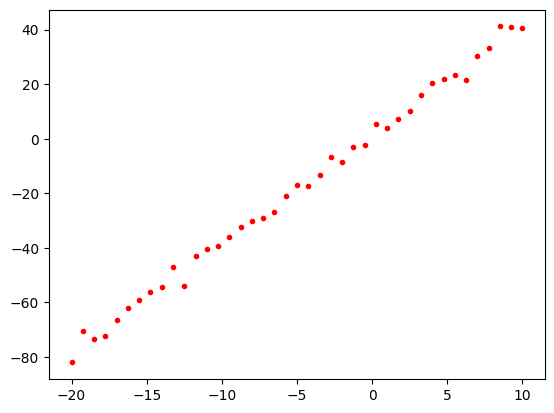

In [3]:
plt.plot(x, y, ".r");

The line is almost perfect but has some noise. 

In [4]:
m, c = np.polyfit(x, y, 1);
m, c


(np.float64(4.016829232239525), np.float64(1.828763500127959))

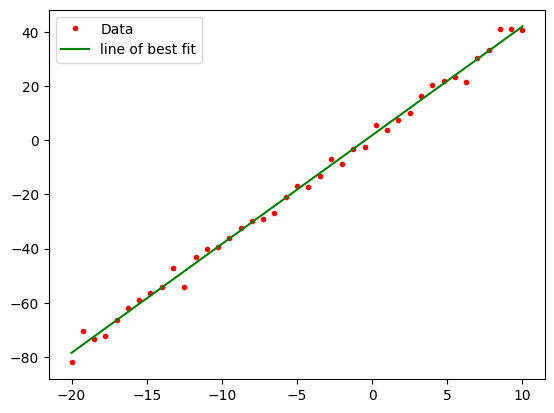

In [5]:
plt.plot(x, y, ".r", label = "Data")
plt.plot(x, m * x + c, "-g", label = "line of best fit");
plt.legend();


We can see that some data points fit on the line, while others not (due to the noise).

Instead of creating 2 separate variables for m and c and printing them separately, we can group them under one variable and print them out as an array:

In [6]:
coeffs = np.polyfit(x, y, 1)
coeffs

array([4.01682923, 1.8287635 ])

As any other array, also *coeffs* can be indexed, so we can access m and c values separately:

In [7]:
coeffs[0] # m, slope

np.float64(4.016829232239525)

In [8]:
coeffs[1] # c, intercept

np.float64(1.828763500127959)

We can evaluate the value of y for each data point using the np.polyval function, that takes the *coeff* coefficients and each x value as reference.

In [9]:
f = np.polyval(coeffs, x)
f

array([-78.50782114, -75.49519922, -72.4825773 , -69.46995537,
       -66.45733345, -63.44471152, -60.4320896 , -57.41946768,
       -54.40684575, -51.39422383, -48.3816019 , -45.36897998,
       -42.35635805, -39.34373613, -36.33111421, -33.31849228,
       -30.30587036, -27.29324843, -24.28062651, -21.26800459,
       -18.25538266, -15.24276074, -12.23013881,  -9.21751689,
        -6.20489496,  -3.19227304,  -0.17965112,   2.83297081,
         5.84559273,   8.85821466,  11.87083658,  14.8834585 ,
        17.89608043,  20.90870235,  23.92132428,  26.9339462 ,
        29.94656813,  32.95919005,  35.97181197,  38.9844339 ,
        41.99705582])

In [10]:
len(f)

41

The x array contains 41 elements and, as expected, the np.polyval produced 41 y values, one predicted y value for each element of x.

Comparing the f (array of predicted y values) array with y (array of real y values):

In [11]:
y

array([-82.07179889, -70.41697047, -73.54101938, -72.45829196,
       -66.46069007, -62.13159646, -59.0766801 , -56.27945979,
       -54.22234142, -47.16650391, -54.1364859 , -43.10425578,
       -40.27245289, -39.42168743, -35.92962503, -32.51275616,
       -29.99981803, -29.17617014, -26.88086474, -21.00650097,
       -17.06295273, -17.24179249, -13.23309974,  -6.85848482,
        -8.64398064,  -3.14418511,  -2.38255939,   5.4533857 ,
         3.81692863,   7.30218144,  10.224762  ,  16.14895466,
        20.26831732,  22.00716213,  23.36945683,  21.41919786,
        30.26030781,  33.25103357,  41.16904606,  40.98101342,
        40.6905879 ])

We can see that the data points fitting the line have a y value very close to the correspondent f value (which is the y value of the fitted line).  
Vice versa, the data points not fitting the line (located very far from the line) will have a y value very different from the correspondent f value.

# Evaluate the Line of Best Fit - $R^2$ coefficient of determination

We can evaluate the fit of the Line of Best Fit ($R^2$) to the data points.  
https://en.wikipedia.org/wiki/Coefficient_of_determination

The value of $R^2$ is between 0 and 1 ($0 < R^2 < 1$), where 1 corresponds to a perfect fit, while 0 to a bad fit.


This can be done analytically or programmatically.

## Analytical Method

$ R^2 = 1 - (SS\_res / SS\_tot)$

Where the Residual Sum of Squares ($SS\_res$) corresponds to the difference between the predicted y value (f) and the real y value (y), and is expressed as:  
$SS\_res = \sum_i(y_i - f_i)^2$

And the Total Sum of Squares ($SS\_tot$) is:   
$SS\_tot = \sum_i(y_i - \overline y)^2$

$\overline y$ is the mean of the observed values: $\overline y = 1/n \sum y_i$

In [12]:
# calculate the Residual Sum of Squares
ss_res = np.sum((y - f) **2)
ss_res

np.float64(236.13171893979901)

In [13]:
# calculate the mean of y 
y_mean = np.mean(y)
y_mean

np.float64(-18.255382661069664)

In [14]:
# calculate the Total Sum of Squares
ss_tot = np.sum((y - y_mean)**2)
ss_tot

np.float64(52331.745244134494)

In [16]:
# calculate the SS_res / SS_tot ratio
ratio = ss_res / ss_tot
ratio

np.float64(0.004512207988443982)

A $SS\_res / SS\_tot$ ratio of 0.004 is an extremely low value indicating that the difference between the predicted y values (f) and the real y values (SS_res) is very small compared to the variation in y values (SS_tot).

Now we can calculate the $R^2$ value:

In [ ]:
# calculate the R squared
r_sq = 1.0 - (ratio)
r_sq

np.float64(0.995487792011556)

The $R^2 = 0.99$ is very close to 1 and indicates an almost perfect fit.

## Use SciPy

Computing the least squares regression for x and y.   
https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.linregress.html

In [ ]:
# calculate all the possible values using SciPy
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(x,y)


0.9977413452451273


We can then access the values we need one by one:

In [ ]:
# print the r_value (correlation coefficient)
print(r_value)

Alternatively, we can print them all at once:

In [21]:
fit = sp.stats.linregress(x, y)
fit

LinregressResult(slope=np.float64(4.016829232239525), intercept=np.float64(1.828763500127959), rvalue=np.float64(0.9977413452451273), pvalue=np.float64(2.3181727744644058e-47), stderr=np.float64(0.043303963816587014), intercept_stderr=np.float64(0.44108440579007524))

In [23]:
# print the slope only
fit.slope

np.float64(4.016829232239525)

In [24]:
# print the r_value
fit.rvalue

np.float64(0.9977413452451273)

In [29]:
# calculate the R squared value from the r_value
fit.rvalue ** 2

np.float64(0.9954877920115562)

We can now compare the two $R^2$ values calculated. We can see that they are not the same but very close.

SciPy statistical significance  
https://www.w3schools.com/python/scipy/scipy_statistical_significance_tests.php

r_value  
https://www.freecodecamp.org/news/what-is-a-correlation-coefficient-r-value-in-statistics-explains/

std_error  
https://en.wikipedia.org/wiki/Standard_error

## END